# 과제1. car seat 매출 분석

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

## 0.환경설정

* 필요한 라이브러리 로딩, 데이터셋 가져오기

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst                              # 가설검정 도구 가져오기

### 2) 데이터 불러오기

In [2]:
path = 'https://raw.githubusercontent.com/JunhoYu/Data-Analysis/main/Carseats.csv'
#data=pd.read_csv('Carseats.csv')
data = pd.read_csv(path)
data.drop(['CompPrice','Income', 'Urban', 'Education'],axis = 1, inplace = True)
data.head()

,Sales,Advertising,Population,Price,ShelveLoc,Age,US
0,9.50,11,276,120,Bad,42,Yes
1,11.22,16,260,83,Good,65,Yes
2,10.06,10,269,80,Medium,59,Yes
3,7.40,4,466,97,Medium,55,Yes
4,4.15,3,340,128,Bad,38,No


|	변수명	|	설명	|	구분	|
|	----	|	----	|	----	|
|	Sales 	|	 각 지역 판매액(단위 : 1000달러)	|	Target	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태(Good, Medium, Bad)	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(Yes, No)	|	feature	|


## 1.가설수립

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ NaN 존재 여부 및 조치 방안  

④ 기초통계량  

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

### 1) Sales

In [4]:
var = 'Sales'
temp = data[var]
#코드간결화

1) 변수의 비즈니스 의미

각 지역 판매액

2) 숫자, 범주?

숫자

3) NaN 존재 유무

In [7]:
temp.isna().sum()

0

4) 기초통계량(수치화)

In [8]:
data[var].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

5) 분포 확인(시각화)

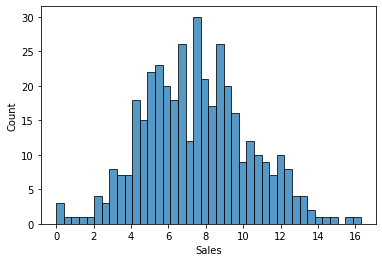

In [9]:
sns.histplot(data[var], bins = 40)
plt.show()

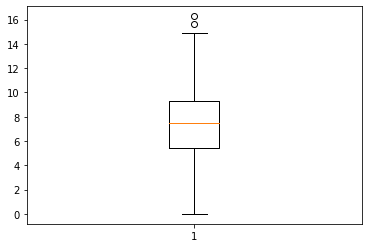

[5.39 0.  ]
[ 9.32 14.9 ]


In [10]:
box = plt.boxplot(data[var])
plt.show()

print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 대부분의 판매액이 6000~10000달러 사이로 추정/
75%가 9000달러 미만이다 /
boxplot을 기준으로 볼 때 1490000 달러 이상은 비싼 가격으로 추정

7) 추가 분석해 볼 사항이 있나요?

> * 0에서 2사이 구간은 할인한 가격인지 확인 필요

### 2) Advertising

In [94]:
var = 'Advertising'

1) 변수의 비즈니스 의미

각 지역, 회사의 광고 예산

2) 숫자, 범주?

숫자

3) NaN 존재 유무

In [12]:
data[var].isna().sum()

0

4) 기초통계량(수치화)

In [95]:
data[var].value_counts()

0     144
10     25
11     22
13     20
5      19
7      16
12     16
3      14
4      12
15     12
16     11
14     11
8      11
9      10
2       9
1       8
19      8
6       7
17      6
18      6
20      4
22      2
23      2
21      1
24      1
25      1
26      1
29      1
Name: Advertising, dtype: int64

In [13]:
data[var].describe()

count    400.000000
mean       6.635000
std        6.650364
min        0.000000
25%        0.000000
50%        5.000000
75%       12.000000
max       29.000000
Name: Advertising, dtype: float64

5) 분포 확인(시각화)

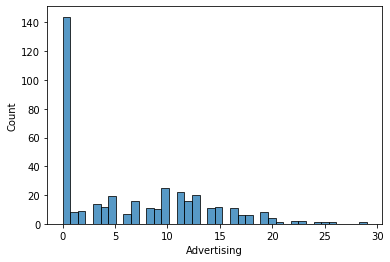

In [14]:
sns.histplot(data[var], bins = 40)
plt.show()

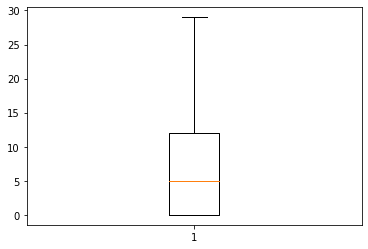

[0. 0.]
[12. 29.]


In [15]:
box = plt.boxplot(data[var])
plt.show()
print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 각 지역 광고 예산은 0이 대부분을 차지하고 있다.
평균값이 6인데 0이 가장 많다는 점에서 원인 조사가 필요해보임
데이터가 없는 값도 눈에 띄는데 조사가 필요해보임

7) 추가 분석해 볼 사항이 있나요?

> * 왜 0에서 데이터가 가장 많은지 조사가 필요해보임

### 3) Population

In [16]:
var='Population'

1) 변수의 비즈니스 의미

지역 인구수

2) 숫자, 범주?

In [ ]:
숫자

3) NaN 존재 유무

In [18]:
data[var].isna().sum()

0

4) 기초통계량(수치화)

In [19]:
data[var].describe()

count    400.000000
mean     264.840000
std      147.376436
min       10.000000
25%      139.000000
50%      272.000000
75%      398.500000
max      509.000000
Name: Population, dtype: float64

5) 분포 확인(시각화)

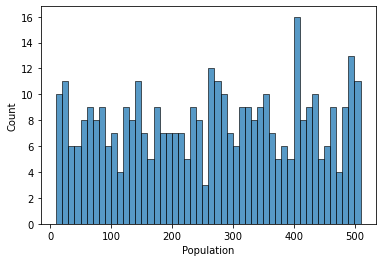

In [21]:
sns.histplot(data[var], bins = 50)
plt.show()

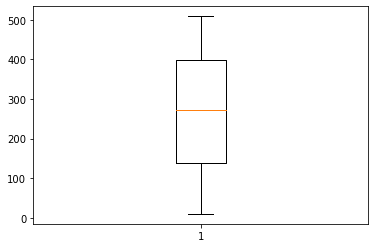

[139.  10.]
[398.5 509. ]


In [22]:
box = plt.boxplot(data[var])
plt.show()
print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 대부분이 비슷하게 나왔지만 인구수가 400(1000명)대가 가장 많은 것으로 분석

7) 추가 분석해 볼 사항이 있나요?

> * 구간마다 작게 나오는 곳이 있는데 조사 필요해보임

### 4) Price

In [23]:
var = 'Price'

1) 변수의 비즈니스 의미

In [ ]:
자사 지역별 판매가격

2) 숫자, 범주?

In [ ]:
숫자

3) NaN 존재 유무

In [24]:
data[var].isna().sum()

0

4) 기초통계량(수치화)

In [25]:
data[var].describe()

count    400.000000
mean     115.795000
std       23.676664
min       24.000000
25%      100.000000
50%      117.000000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

5) 분포 확인(시각화)

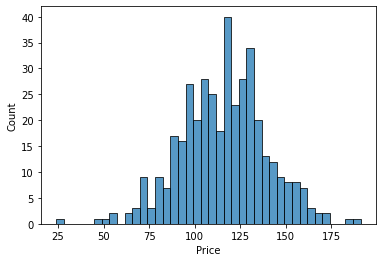

In [26]:
sns.histplot(data[var], bins = 40)
plt.show()

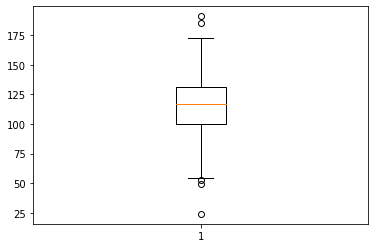

[100.  54.]
[131. 173.]


In [27]:
box = plt.boxplot(data[var])
plt.show()
print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> *  100에서 125사이의 구간이 가장 많은것으로 추정된다.


7) 추가 분석해 볼 사항이 있나요?

> * 중간에 빈 데이터 조사가 필요해보인다

### 5) ShelveLoc

In [28]:
var ='ShelveLoc'

1) 변수의 비즈니스 의미

In [ ]:
진열상태

2) 숫자, 범주?

In [ ]:
범주

3) NaN 존재 유무

In [29]:
data[var].isna().sum()

0

4) 기초통계량(수치화)

In [38]:
print(data[var].value_counts())
print(data[var].value_counts()/ len(data[var]))

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64
Medium    0.5475
Bad       0.2400
Good      0.2125
Name: ShelveLoc, dtype: float64


5) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


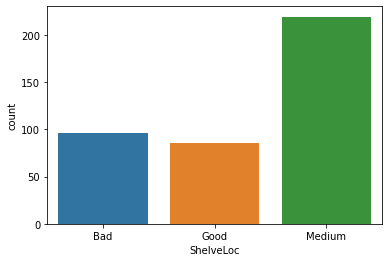

In [36]:
sns.countplot(data[var])
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 전체 400건 / Medium = 0.5%로 반 이상 차지하고 있다.

7) 추가 분석해 볼 사항이 있나요?

> * 판별 기준에 대해서 알아 볼 필요가 있음

### 6) [추가]Age

In [39]:
var = 'Age'

1) 변수의 비즈니스 의미

In [ ]:
지역 인구의 평균 연령

2) 숫자, 범주?

In [ ]:
숫자

3) NaN 존재 유무

In [40]:
data[var].isna().sum()

0

4) 기초통계량(수치화)

In [41]:
data[var].describe()

count    400.000000
mean      53.322500
std       16.200297
min       25.000000
25%       39.750000
50%       54.500000
75%       66.000000
max       80.000000
Name: Age, dtype: float64

5) 분포 확인(시각화)

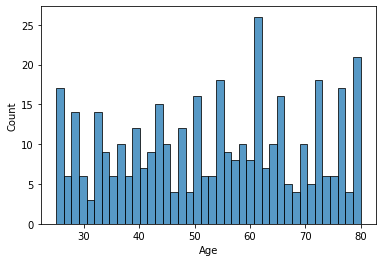

In [42]:
sns.histplot(data[var], bins = 40)
plt.show()

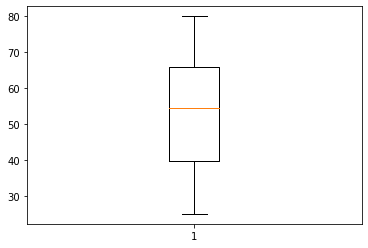

[39.75 25.  ]
[66. 80.]


In [43]:
box = plt.boxplot(data[var])
plt.show()
print(box['whiskers'][0].get_ydata())
print(box['whiskers'][1].get_ydata())

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 모든 연령층에서 구매하는 것으로 나타남

7) 추가 분석해 볼 사항이 있나요?

> * 60대에서 가장 높게 나타나는데 원인 분석 필요해보임

### 7) [추가]US

In [49]:
var ='US'

1) 변수의 비즈니스 의미

In [ ]:
매장이 미국에 있는지 여부

2) 숫자, 범주?

In [ ]:
범주

3) NaN 존재 유무

In [50]:
data[var].isna().sum()

0

4) 기초통계량(수치화)

In [51]:
print(data[var].value_counts())
print(data[var].value_counts()/ len(data[var]))

Yes    258
No     142
Name: US, dtype: int64
Yes    0.645
No     0.355
Name: US, dtype: float64


5) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


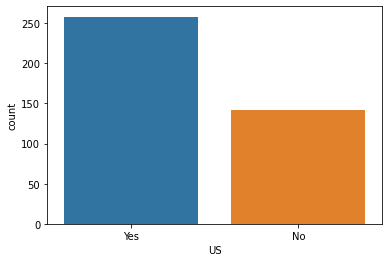

In [53]:
sns.countplot(data[var])
plt.show()

6) 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> * 매장이 60% 정도 미국에 위치해있고 40%는 그렇지 않다.

7) 추가 분석해 볼 사항이 있나요?

> * 매장별로 판매액이 차이가 나는지 분석필요

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

In [ ]:
target = 'Sales'

### (1) 숫자형(수치형) X --> Y
* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

#### 1) Advertising -> Sales

① 시각화 : scatter(regplot), jointplot

In [89]:
target = 'Advertising'
feature = 'Sales'

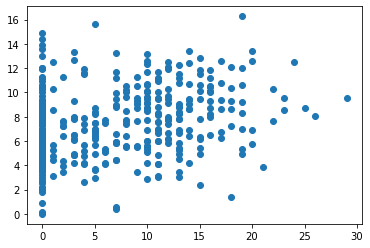

In [57]:
plt.scatter(target, feature, data=data)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


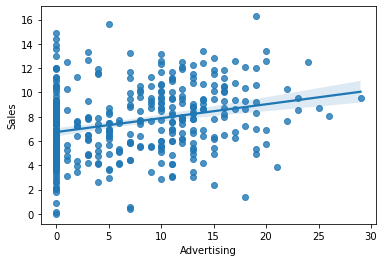

In [92]:
sns.regplot(target,feature,data=data)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


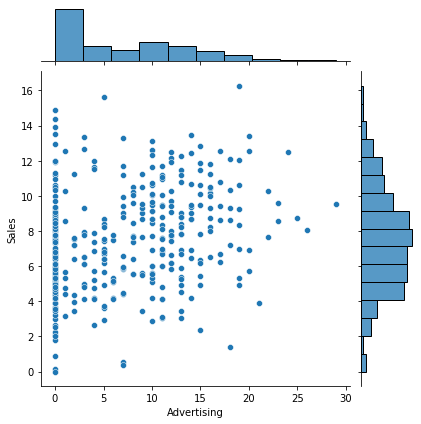

In [58]:
sns.jointplot(target, feature, data=data)
plt.show()

② 수치화 : 상관분석

In [63]:
spst.pearsonr(data['Advertising'], data['Sales'])

(0.269506781376902, 4.377677110302732e-08)

In [64]:
data.corr()

,Sales,Advertising,Population,Price,Age
Sales,1.000000,0.269507,0.050471,-0.444951,-0.231815
Advertising,0.269507,1.000000,0.265652,0.044537,-0.004557
Population,0.050471,0.265652,1.000000,-0.012144,-0.042663
Price,-0.444951,0.044537,-0.012144,1.000000,-0.102177
Age,-0.231815,-0.004557,-0.042663,-0.102177,1.000000


③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

광고 예산 0원과 판매액에서 직선의 데이터가 보이고 이 부분에서 추가적인 분석이 필요해보인다. 또한, pvalue를 보았을 때, 약한 상관관계로 판단된다. 또한 직선구간의 데이터가 여러번 보이는데 이 부분에 대한 분석이 필요해보인다.

#### 2) Population -> Sales

① 시각화 : scatter(regplot), jointplot

In [65]:
target = 'Population'
feature = 'Sales'

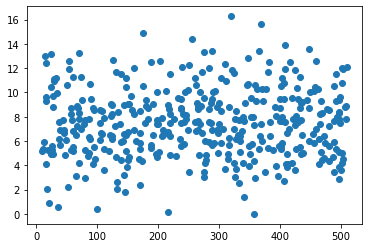

In [66]:
plt.scatter(target, feature, data=data)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


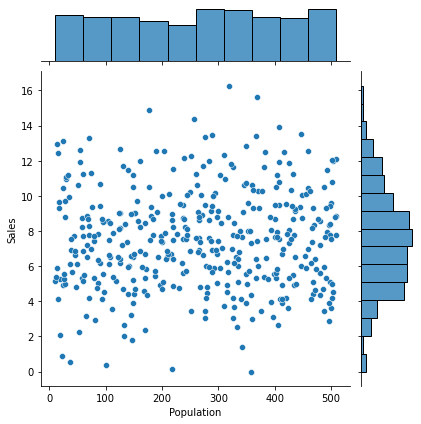

In [67]:
sns.jointplot(target, feature, data=data)
plt.show()

② 수치화 : 상관분석

In [68]:
spst.pearsonr(data['Population'], data['Sales'])

(0.0504709844720392, 0.31398160931903)

③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

지역 인구수와 각 지역 판매액과는 상관이 커보이지는 않는다.

#### 3) Price -> Sales

① 시각화 : scatter(regplot), jointplot

In [69]:
target = 'Price'
feature = 'Sales'

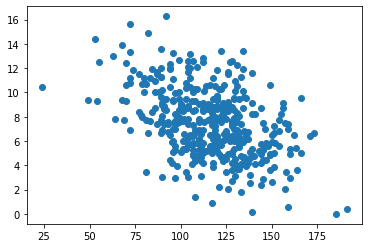

In [70]:
plt.scatter(target, feature, data=data)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


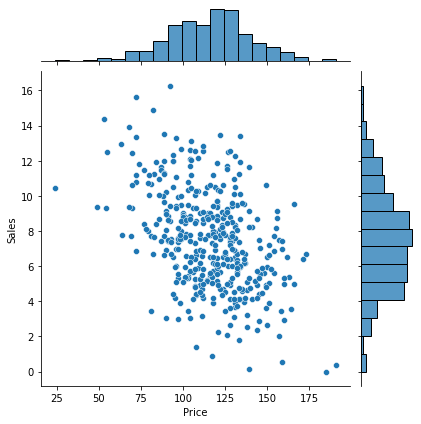

In [71]:
sns.jointplot(target, feature, data=data)
plt.show()

② 수치화 : 상관분석

In [72]:
spst.pearsonr(data['Price'], data['Sales'])

(-0.4449507278465726, 7.61818701191294e-21)

③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

자사 지역별 판매가격과 각 지역 판매액은 상관관계가 있어보인다.
시각화로 보았을 때 , 산점도 분포에서 밀집된 구간을 보아 관계가 있다는 것으로 판단된다.

#### 4) [추가] Age -> Sales

① 시각화 : scatter(regplot), jointplot

In [73]:
target = 'Age'
feature = 'Sales'

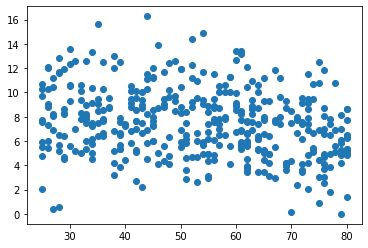

In [74]:
plt.scatter(target, feature, data=data)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


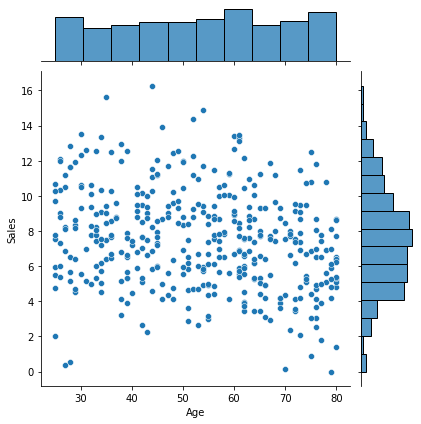

In [75]:
sns.jointplot(target, feature, data=data)
plt.show()

② 수치화 : 상관분석

In [76]:
spst.pearsonr(data['Age'], data['Sales'])

(-0.2318154396045765, 2.7889498393711916e-06)

③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

지역 인구의 평균 연령과 각 지역 판매액은 약한 상관관계로 보인다.
sales에서 주로 4-12 구간에 밀집 되어 있는 것을 볼 수 있고, 나이는 전체적으로 모든 구간에서 평이하게 나타난다.

### (2) 범주형 X --> Y

* 모든 범자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

#### 1) ShelveLoc-> Sales

① 시각화 : 평균비교 barplot

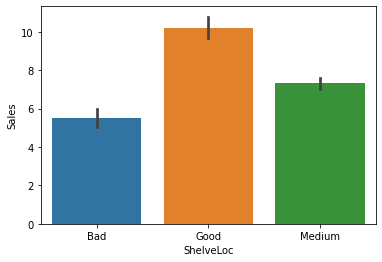

In [77]:
sns.barplot(x='ShelveLoc', y='Sales', data=data)
plt.show()

② 수치화 : t-test, anova

In [80]:
ShelveLoc_1 = data.loc[data.ShelveLoc == 'Bad', 'Sales']
ShelveLoc_2 = data.loc[data.ShelveLoc == 'Good', 'Sales']
ShelveLoc_3 = data.loc[data.ShelveLoc == 'Medium', 'Sales']

In [81]:
spst.f_oneway(ShelveLoc_1,ShelveLoc_2,ShelveLoc_3)

F_onewayResult(statistic=92.22990509910346, pvalue=1.26693609015938e-33)

③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

진열 상태와 각 지역 판매액은 어느정도 상관관계가 있어 보인다.
medium이 50%이상을 차지했으나 평균비교를 하니 good의 수치가 더 많이 나오게 되었다. 조사필요!

#### 2) [추가]US-> Sales

① 시각화 : 평균비교 barplot

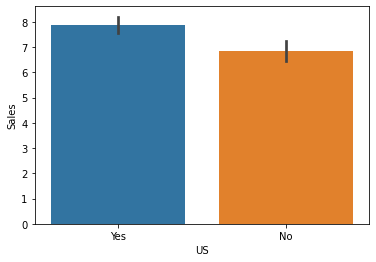

In [82]:
sns.barplot(x='US', y='Sales', data=data)
plt.show()

② 수치화 : t-test, anova

In [83]:
us0 = data.loc[data['US']=='Yes', 'Sales']
us1 = data.loc[data['US']=='No', 'Sales']

In [84]:
spst.ttest_ind(us0, us1)

Ttest_indResult(statistic=3.589738747802499, pvalue=0.00037233958701471517)

③ 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

약한 상관관계로 분석된다.

## 4.관계 정리

### 1) 강한관계의 변수

In [ ]:
Price, ShelveLoc 

### 2) 약한관계의 변수

In [ ]:
Advertising, Age, US

### 3) 관계 없음

In [ ]:
Population

### 4) 추가 분석

Advertising 0 구간과 빈 데이터 구간 추가적인 분석

매장은 주로 어디에 위치해있는지 분석

ShelveLoc 기준점이 무엇인지 분석필요